In [ ]:
# Recent versions of two useful libraries are installed

!pip install pandas==1.3.3
!pip install numpy==1.20.3

In [1]:
# Last month’s historical data (closing prices) on a daily base are downloaded for some of the largest companies listed on the FTSE MIB

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# Symbol list of companies listed on FTSE MIB
companies = ["AZM.MI", "ENI.MI", "ENEL.MI", "ISP.MI", "LDO.MI"]

# Today and date a month ago
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=30)).strftime('%Y-%m-%d')

# Initialize an empty DataFrame for data
historical_data = pd.DataFrame()

# Extract data for each company
for company_symbol in companies:
    company_data = yf.download(company_symbol, start=start_date, end=end_date)
    historical_data[company_symbol] = company_data['Close']

# Print historical data of companies
print(historical_data)

# Yahoo Finance data arrives a day late so we will have last month’s prices available until the day before the run

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
               AZM.MI  ENI.MI  ENEL.MI  ISP.MI  LDO.MI
Date                                                  
2023-08-03  20.660000  13.666    6.006  2.5455  12.550
2023-08-04  20.730000  13.724    5.943  2.5435  12.910
2023-08-07  20.670000  13.678    5.932  2.5600  13.310
2023-08-08  20.770000  13.626    5.923  2.3380  13.345
2023-08-09  20.809999  14.068    6.007  2.3925  13.320
2023-08-10  20.980000  14.126    6.096  2.4380  13.345
2023-08-11  20.830000  14.048    6.006  2.4395  13.185
2023-08-14  21.010000  14.014    6.054  2.4450  13.085
2023-08-16  20.959999  13.930    5.953  2.4290  12.870
2023-08-17  20.650000  13.974    5.884  2.4195  12

In [2]:
# Other useful libraries are installed

!pip install yfinance numpy statsmodels matplotlib

[*********************100%***********************]  1 of 1 completed
Forecast date: 2023-09-03
Forecast for the day after the run: 21.39158476676075


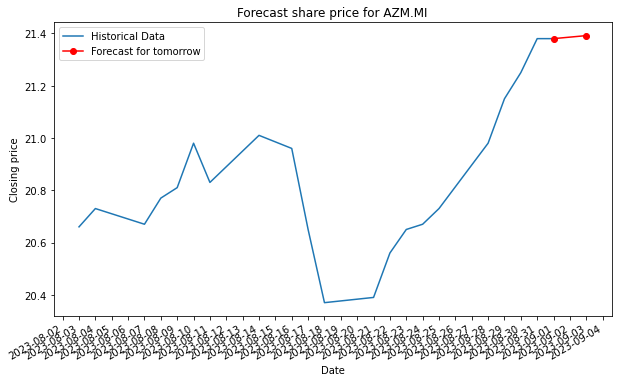

In [2]:
# Based on the extracted data of the last month, a forecast is made for the day after the run using an ARIMA model.

import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Symbol of the company you want to forecast
company_symbol = "AZM.MI"

# Today and forecast date ("tomorrow")
end_date = datetime.today().strftime('%Y-%m-%d')
forecast_date = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=30)).strftime('%Y-%m-%d')

try:
    # Extract historical closing price data
    company_data = yf.download(company_symbol, start=start_date, end=end_date)
    closing_prices = company_data['Close']

    # Remove Nan or infinite values
    closing_prices = closing_prices.dropna()

    if len(closing_prices) < 2:
        raise ValueError("There is not enough data to make a prediction.")

    # Set the frequency of the date index to’D' (daily)
    closing_prices = closing_prices.asfreq('D')

    # Interpolation to fill missing values
    closing_prices = closing_prices.interpolate()

    # Creation of the ARIMA model
    model = ARIMA(closing_prices, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    
    # Make the forecast for the day after the run
    forecast, stderr, conf_int = model_fit.forecast(steps=1)

    # Print the forecast for tomorrow
    print("Forecast date:", forecast_date)
    print("Forecast for the day after the run:", forecast[0])

    # Plot of historical data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(closing_prices.index, closing_prices.values, label='Historical Data')
    plt.plot([closing_prices.index[-1], pd.to_datetime(forecast_date)], [closing_prices.iloc[-1], forecast[0]], marker='o', color='r', label='Forecast for tomorrow')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.title(f'Forecast share price for {company_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Closing price')
    plt.show()

except Exception as e:
    print("An error has occurred:", e)
    
# The result of the script is given from the date of forecast 
# and from the relative forecasted price 
# more a diagram that shows the course of the historical data and the forecasted value.